In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df_sallers_processed = pd.read_csv('../data/processed/sellers_processed.csv')

## Vamos começar com as observações iniciais sobre os dados.

In [2]:
print(df_sallers_processed.head())
df_sallers_processed.info()
df_sallers_processed.describe()

   order_id  order_date   customer_city       product_name seller_id   price  \
0        60  2021-06-26  RIO DE JANEIRO      MOUSE SEM FIO    SELL02   123.0   
1        59  2021-06-24       SÃO PAULO     NOTEBOOK GAMER    SELL01  4710.0   
2        58  2021-06-22        CURITIBA  HEADSET BLUETOOTH    SELL02   262.0   
3        57  2021-06-20  BELO HORIZONTE      CADEIRA GAMER    SELL04  1125.0   
4        56  2021-06-18  RIO DE JANEIRO       MONITOR 24''    SELL01   920.0   

   freight_value  quantity  
0             15         3  
1             60         1  
2             30         1  
3            100         1  
4             40         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       60 non-null     int64  
 1   order_date     60 non-null     object 
 2   customer_city  60 non-null     object 
 3   product_name   60 

,order_id,price,freight_value,quantity
count,60.000000,60.000000,60.000000,60.000000
mean,30.500000,1369.900000,46.666667,1.316667
std,17.464249,1691.052913,31.484011,0.624138
min,1.000000,120.000000,15.000000,1.000000
25%,15.750000,259.500000,25.000000,1.000000
50%,30.500000,887.500000,40.000000,1.000000
75%,45.250000,1146.250000,60.000000,1.000000
max,60.000000,4720.000000,120.000000,3.000000


- A coluna de data está em formato 'object', isso prejudica a futura análise temporal, vamos passar para data.

In [3]:
df_sallers_processed['order_date'] = pd.to_datetime(df_sallers_processed['order_date'])
print(df_sallers_processed.dtypes)

order_id                  int64
order_date       datetime64[ns]
customer_city            object
product_name             object
seller_id                object
price                   float64
freight_value             int64
quantity                  int64
dtype: object


# 1. Visão Geral
### 1.1 Quantos pedidos (`order_id`) únicos existem?



- R: Total de 60 pedidos. 






In [4]:
total_orders = df_sallers_processed['order_id'].count()
print(total_orders)

60


### 1.2 Qual a distribuição de produtos (`product_name`) diferentes que foram vendidos}?



product_name
CADEIRA GAMER        10
HEADSET BLUETOOTH     9
MONITOR 24''         10
MOUSE SEM FIO        28
NOTEBOOK GAMER       12
TECLADO MECÂNICO     10
Name: quantity, dtype: int64
79


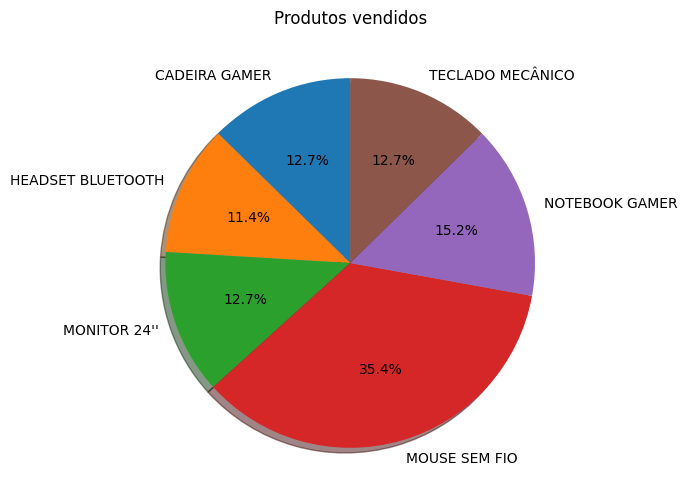

In [5]:
total_products_distincts = df_sallers_processed.groupby('product_name')['quantity'].sum()
total_products = total_products_distincts.sum()
print(total_products_distincts)
print(total_products)

plt.figure(figsize=(6, 6))
total_products_distincts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Produtos vendidos')
plt.ylabel('')
plt.savefig("../outputs/porcentagem_produtos.png", dpi=300, bbox_inches="tight")


### 1.3 Quantas cidades (`customer_city`) foram atendidas?

- Foram vendidas para as cidades de: Rio de Janeiro, São Paulo, Curitiba e Belo Horizonte.


In [6]:
total_city_distincts = df_sallers_processed['customer_city'].unique()
print(total_city_distincts)

['RIO DE JANEIRO' 'SÃO PAULO' 'CURITIBA' 'BELO HORIZONTE']


### 1.4 Qual é o período do dataset (data mínima e máxima em `order_date`)?

- O período dataframe verificado vai de 05/01/2021 até 26/06/2021, ou seja, estamos analisando as vendas num período de 5 meses e 21 dias.

In [7]:
date_max = df_sallers_processed['order_date'].max()
date_min = df_sallers_processed['order_date'].min()
print(date_max, date_min)


2021-06-26 00:00:00 2021-01-05 00:00:00


## 2. Análise Temporal
### 2.1 Como os pedidos variam ao longo do tempo (mês)?

In [8]:
meses_ordem = ['January', 'February', 'March', 'April', 'May', 'June', ]

df_sallers_processed['month'] = pd.Categorical(
    df_sallers_processed['order_date'].dt.month_name(),
    categories=meses_ordem,
    ordered=True
)
print(df_sallers_processed.head())

   order_id order_date   customer_city       product_name seller_id   price  \
0        60 2021-06-26  RIO DE JANEIRO      MOUSE SEM FIO    SELL02   123.0   
1        59 2021-06-24       SÃO PAULO     NOTEBOOK GAMER    SELL01  4710.0   
2        58 2021-06-22        CURITIBA  HEADSET BLUETOOTH    SELL02   262.0   
3        57 2021-06-20  BELO HORIZONTE      CADEIRA GAMER    SELL04  1125.0   
4        56 2021-06-18  RIO DE JANEIRO       MONITOR 24''    SELL01   920.0   

   freight_value  quantity month  
0             15         3  June  
1             60         1  June  
2             30         1  June  
3            100         1  June  
4             40         1  June  


### Vamos tirar métricas por mês

- Total de pedidos por mês

month
January      5
February     5
March       10
April       11
May         16
June        13
Name: order_id, dtype: int64


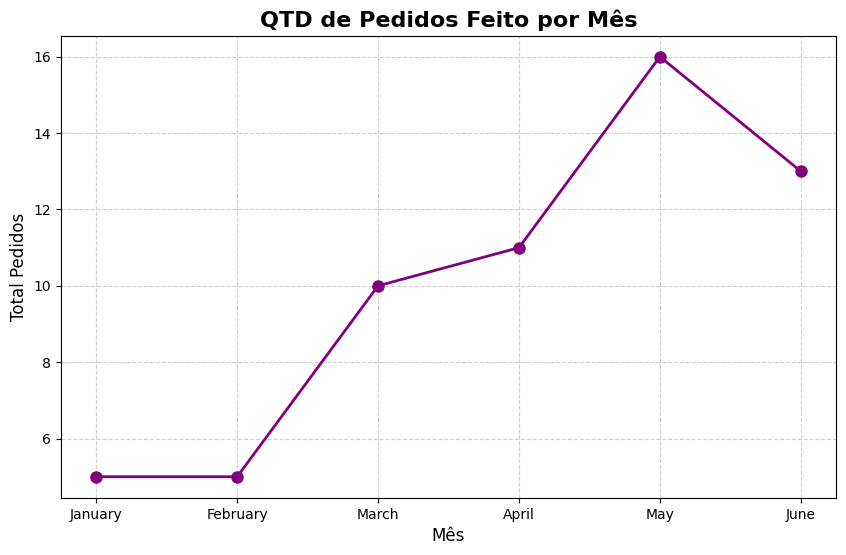

In [ ]:
total_order_month = df_sallers_processed.groupby('month', observed=False)['order_id'].count()
print(total_order_month)

plt.figure(figsize=(10, 6))
total_order_month.plot(kind='line', marker='o', linestyle='-', color='purple',  linewidth=2,
    markersize=8
)


plt.title('QTD de Pedidos Feito por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total Pedidos', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("../outputs/total_pedidos_mes.png", dpi=300, bbox_inches="tight")
plt.show()

- Total vendidos por mes

month
January      6
February     7
March       13
April       14
May         21
June        18
Name: quantity, dtype: int64


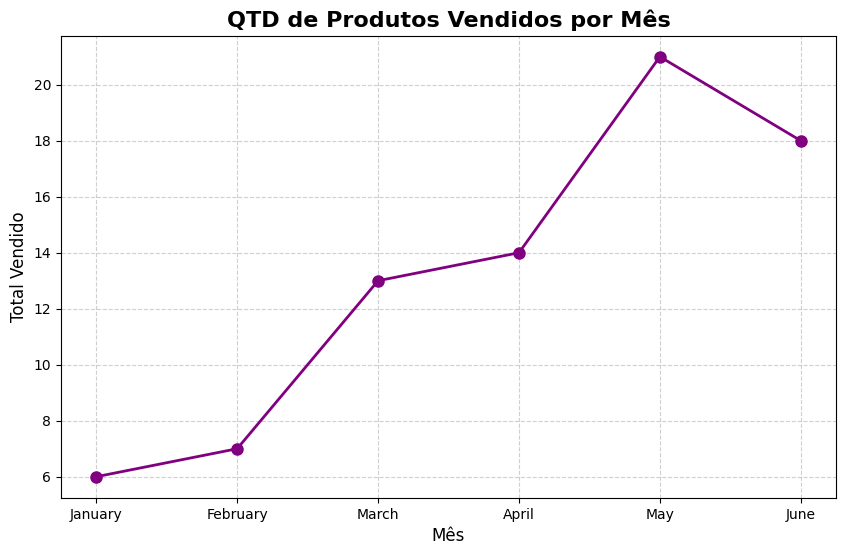

In [ ]:
total_sales_month = df_sallers_processed.groupby('month', observed=False)['quantity'].sum()
print(total_sales_month)

plt.figure(figsize=(10, 6))
total_sales_month.plot(kind='line', marker='o', linestyle='-', color='purple',  linewidth=2,
    markersize=8
)

plt.title('QTD de Produtos Vendidos por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total Vendido', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("../outputs/total_vendidos_mes.png", dpi=300, bbox_inches="tight")
plt.show()

- Total faturamento por mes

month
January      7040.0
February     7240.0
March       13380.0
April       14902.0
May         22505.0
June        20008.0
Name: revenue, dtype: float64


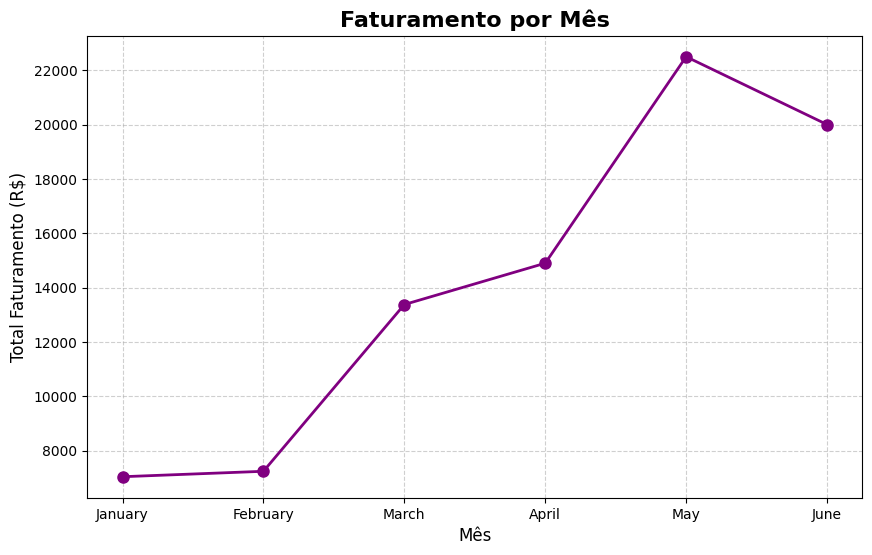

In [ ]:
df_sallers_processed['revenue'] = df_sallers_processed['price'] * df_sallers_processed['quantity']
total_revenue_month = df_sallers_processed.groupby('month', observed=False)['revenue'].sum()

print(total_revenue_month)

plt.figure(figsize=(10, 6))
ax = total_revenue_month.plot(
    kind='line', 
    marker='o', 
    linestyle='-', 
    color='purple',
    linewidth=2,
    markersize=8
)


plt.title('Faturamento por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total Faturamento (R$)', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)


plt.savefig("../outputs/total_faturamento_mes.png", dpi=300, bbox_inches="tight")
plt.show()

## Resumo das métricas

In [12]:
resumo_mensal = df_sallers_processed.groupby('month').agg(
    pedidos=('order_id', 'count'),
    vendidos=('quantity', 'sum'),
    faturamento=('revenue', 'sum')
)
resumo_mensal.to_csv("../outputs/resumo_mensal.csv")

C:\Users\Flamme\AppData\Local\Temp\ipykernel_13712\1780662995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo_mensal = df_sallers_processed.groupby('month').agg(


### Conclusão: 